In [144]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from shapely.affinity import translate
import geopandas as gpd

In [115]:
## Given a line segment represented by A and B points
## Given a point P, check in which side of the line the point lies:

A = Point(-30,10)
B = Point(29,-15)
P = Point(15,28)

line = LineString([A,B])

**Finding the direction of point using cross product:**

The Cross-Product has an interesting Property which will be used to determine direction of a point from a line segment. That is, the cross-product of two points is positive if and only if the angle of those point at origin (0, 0) is in counter-clockwise. And conversely the cross-product is negative if and only if the angle of those point at origin is in clockwise direction

![](https://media.geeksforgeeks.org/wp-content/uploads/point5.png)

in order to do this, we will translate one of the coordinate of the given line segment to origin (0,0):

![](https://media.geeksforgeeks.org/wp-content/uploads/point6.png)

We will use `shapely.affinity.translate(geom, xoff=0.0, yoff=0.0, zoff=0.0)` operation for this: 

[More on this function](https://shapely.readthedocs.io/en/stable/manual.html#shapely.affinity.translate)

**Reference of this theory -**

[Article on GeeksforGeeks](https://www.geeksforgeeks.org/direction-point-line-segment/)

In [117]:
## First translate one of the coordinates to origin:
x,y = np.array(line)
## define the new points
B_ = translate(B,xoff=-A.x, yoff=-A.y)
P_ = translate(P,xoff=-A.x, yoff=-A.y)

direction = 1 if np.cross(B_,P_)>0 else -1
direction

1

In [122]:
[A.x, B.y]

[-30.0, -15.0]

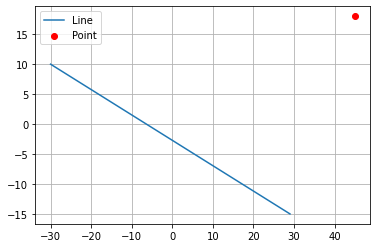

In [133]:
plt.plot([A.x, B.x],[A.y, B.y], label="Line")
plt.scatter(P_.x, P_.y, label="Point", color="Red")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

Lets convert this into a function so that it can be used in further analysis:

In [167]:
def point_direction(A,B,P, plot=False):
    
    '''
    this function returns on which side a point lies of the line
    return -1 and 1 for either diretions
    
    PARAMETERS:
    - "A" and "B" points of a line segment as shapely Point object
    - "P" Point as shapely Point object of whose direction needs to be determined with respect to given line
    '''
    
    B_ = translate(B,xoff=-A.x, yoff=-A.y)
    P_ = translate(P,xoff=-A.x, yoff=-A.y)
    
    cross_product = np.cross(B_,P_)  
        
    if plot==True:
        plt.plot([A.x, B.x],[A.y, B.y], label="Line")
        plt.scatter(P.x, P.y, label="Point", color="Red")
        plt.grid(True)
        plt.legend(loc="upper left")
        plt.show()
    
    if cross_product > 0:
        return 1
    elif cross_product < 0:
        return -1
    else:
        return 0

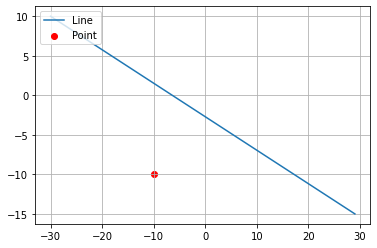

-1

In [138]:
P2 = Point(-10,-10)
point_direction(A,B,P2, plot=True)

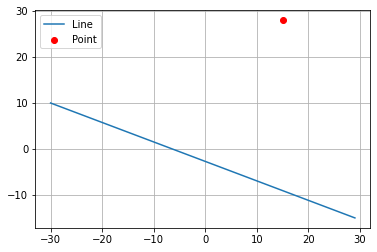

1

In [135]:
A = Point(-30,10)
B = Point(29,-15)
P = Point(15,28)

point_direction(A,B,P, plot=True)

In [169]:
points = gpd.GeoSeries([P, P2]).apply(lambda P: point_direction(A,B,P)).values
points

array([ 1, -1], dtype=int64)